<a href="https://colab.research.google.com/github/iayushkd/Volve_Production_Data_Analysis/blob/main/Volve_Production_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIM**

* The aim is to perform Exploratory Data Analysis (EDA) on publicly available Well-Production data of Volve Field.

* To analyze the Well production data of producer wells of Volve field to gain insights about differences between the producer wells and to help the petroleum management team in identifying the wells having significant production as well as to find those wells that are might be on the path to being dry.



# Analysis will include -

* A description of the data source used
* Documentation of any cleaning or manipulation of data
* A summary of the analysis
* Supporting visualizations and key findings
* Recommendations based on my analysis

In [ ]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# loading dataset
data = pd.read_excel('/content/Volve production data.xlsx')
df = pd.DataFrame(data)
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [ ]:
df.info() # brief information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

In [ ]:
null_values = df.isnull().sum().sort_values(ascending = False) # number of null values in all columns of data
null_values[null_values.values>0] # the below columns contains null values

,0
BORE_WI_VOL,9928
AVG_ANNULUS_PRESS,7744
AVG_CHOKE_SIZE_P,6715
AVG_DOWNHOLE_PRESSURE,6654
AVG_DOWNHOLE_TEMPERATURE,6654
AVG_DP_TUBING,6654
AVG_WHT_P,6488
AVG_WHP_P,6479
BORE_WAT_VOL,6473
BORE_GAS_VOL,6473


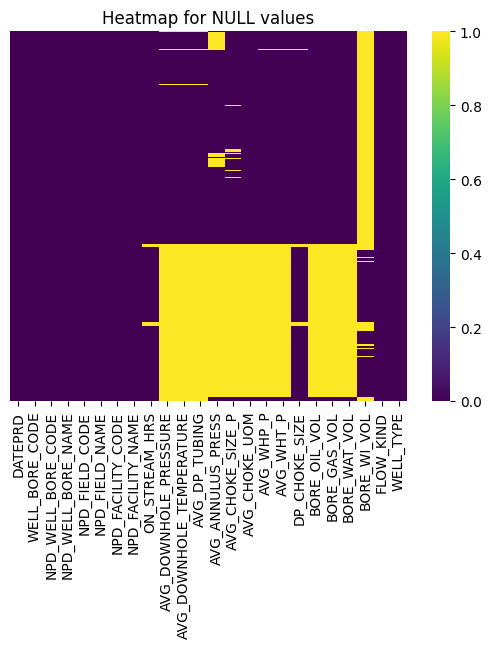

In [ ]:
sns.heatmap(df.isnull(),cmap = 'viridis',yticklabels = False)
plt.title('Heatmap for NULL values');

**Heatmap - To get a visual idea about the null values in all columns, yellow region represents null values**

In [ ]:
# DATEPRD - Date of production
arr = df['DATEPRD'].dt.year.unique()
arr.sort() # this is null object
arr

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int32)

**Production started from 2007 and ended in 2016**

In [ ]:
# WELL_BORE_CODE
df['WELL_BORE_CODE'].unique()

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-4 AH',
       'NO 15/9-F-5 AH'], dtype=object)

In [ ]:
# NPD_WELL_BORE_CODE
df['NPD_WELL_BORE_CODE'].unique()

array([7405, 7078, 5599, 5351, 7289, 5693, 5769])

In [ ]:
# NPD_WELL_BORE_NAME
df['NPD_WELL_BORE_NAME'].nunique()

7

**As we can see from the above three cells, there are 7 unique wells for which data is gathered.**

In [ ]:
# NPD_FIELD_CODE
df['NPD_FIELD_CODE'].unique()

array([3420717])

**We have a single field named VOLVE**

In [ ]:
df['NPD_FACILITY_CODE'].unique() # we have a single facility named MÆRSK INSPIRER

array([369304])

**We have a single facility named MÆRSK INSPIRER**

In [ ]:
df['BORE_OIL_VOL'].sum().round(2)

10037080.61

**Total Oil produced from 2007-2016 is 10037080.61 Sm3**

In [ ]:
df['BORE_GAS_VOL'].sum().round(2)

1475370435.94

**Total Gas produced from 2007-2016 is 1475370435.94 Sm3**

In [ ]:
df['BORE_WAT_VOL'].sum().round(2)

15318578.35

**Total Water produced from 2007-2016 is 15318578.35 Sm3**

In [ ]:
df['BORE_WI_VOL'].sum().round(2)

30330133.53

**Total water injected into the injector well from 2007-2016 is 30330133.53 Sm3**

In [ ]:
df['FLOW_KIND'].unique()

array(['production', 'injection'], dtype=object)

In [ ]:
df['WELL_TYPE'].unique() # it will return type of wells, only two type of wells, injector and producer well

array(['WI', 'OP'], dtype=object)

**Above two code cells shows that we have 2 types of wells:**
1. **Production Well**
2. **Injection Well**



In [ ]:
df['WELL_TYPE'].value_counts()

,count
WELL_TYPE,
OP,9143
WI,6491


**We have 9143 datapoints for production well and 6491 datapoints for injector well**

In [ ]:
df.groupby('WELL_TYPE')['WELL_BORE_CODE'].nunique()

,WELL_BORE_CODE
WELL_TYPE,
OP,6
WI,3


**We have 6 production wells and 3 injector wells**

In [ ]:
df.query("WELL_TYPE == 'OP'")['NPD_WELL_BORE_CODE'].unique()

array([7405, 7078, 5599, 5351, 7289, 5769])

In [ ]:
df.query("WELL_TYPE == 'WI'")['NPD_WELL_BORE_CODE'].unique()

array([7405, 5693, 5769])

**Well no.  7405, 5769  are used for both production and injection.**

**Well no.  7078, 5599, 5351, 7289  are used for only production.**

**Well no.  5693  used for only injection.**

The dataframe has total 24 columns.

As observed in the glimpse of dataframe , we have these useful columns for our study:

* DATEPRD : this column contains date of production
* NPD_WELL_BORE_CODE : This is the unique identifier for a well
* BORE_OIL_VOL : Volumetric Data for Produced Oil
* BORE_GAS_VOL : Volumetric Data for Produced Gas
* BORE_WAT_VOL : Volumetric Data for Produced Water
* WELL_TYPE : Type of well Injector or Producer (We will focus only on producer wells)





In [ ]:
df_production_wells = df.query("WELL_TYPE == 'OP'")

**Our main analysis is based on production of Oil and Gas so we are filtering data for production wells only**

In [ ]:
df_production_filtered = df_production_wells.drop(labels=['WELL_BORE_CODE',
                         'NPD_WELL_BORE_NAME',
                         'NPD_FIELD_CODE',
                         'NPD_FIELD_NAME',
                         'NPD_FACILITY_CODE',
                         'NPD_FACILITY_NAME',
                        'AVG_CHOKE_UOM',
                        'FLOW_KIND',
                        'WELL_TYPE'], axis=1)

**The dataframe has many columns that are not useful for our analysis droping all these column in our filtered dataframe as these are not useful for our study.**

In [ ]:
df_production_filtered.head()

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
1,2014-04-08,7405,0.0,NaN,NaN,NaN,0.0,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
2,2014-04-09,7405,0.0,NaN,NaN,NaN,0.0,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
3,2014-04-10,7405,0.0,NaN,NaN,NaN,0.0,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
4,2014-04-11,7405,0.0,310.37614,96.87589,277.27826,0.0,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN
5,2014-04-12,7405,0.0,303.50078,96.92339,281.44744,0.0,3.087015,22.05334,8.70429,22.05334,0.0,0.0,0.0,NaN


**GLimpse of the filtered data**

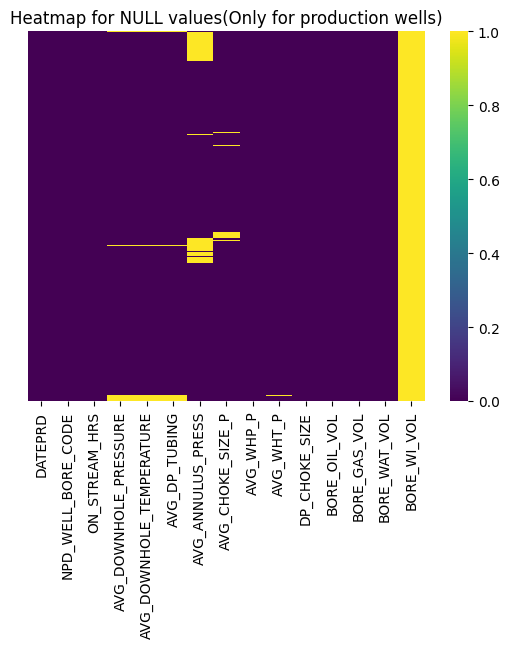

In [ ]:
sns.heatmap(df_production_filtered.isnull(),cmap = 'viridis',yticklabels = False) # checking for null values in the filtered dataframe
plt.title('Heatmap for NULL values(Only for production wells)');

**Heatmap is showing the number of null values in each column for the filtered data.**

**As you can observe the BORE_WI_OIL has all values null because we have data for production wells only.**

In [ ]:
df_production_filtered['NPD_WELL_BORE_CODE'].value_counts()

,count
NPD_WELL_BORE_CODE,
5599,3056
5351,3056
7078,1165
7289,978
7405,744
5769,144


**Number of data associated with all the 6 production wells**

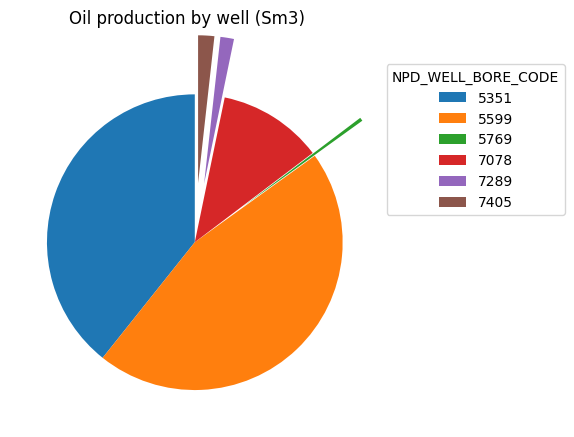

In [ ]:
fig,ax =plt.subplots()
ax.pie(df_production_filtered.groupby('NPD_WELL_BORE_CODE')['BORE_OIL_VOL'].sum(),startangle=90,explode = (0,0,0.4,0,0.4,0.4))
ax.legend(bbox_to_anchor=(1, 1),title = 'NPD_WELL_BORE_CODE',labels = df_production_filtered.groupby('NPD_WELL_BORE_CODE')['BORE_OIL_VOL'].sum().index)
fig.suptitle('Oil production by well (Sm3)')
plt.show()
# remember this way to remove legends from pie chart

**Major contributors in total oil production are - 5351, 5599, 7078**

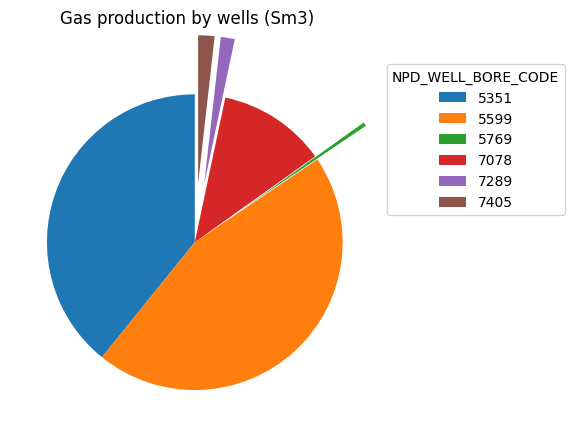

In [ ]:
  fig,ax =plt.subplots()
  ax.pie(df_production_filtered.groupby('NPD_WELL_BORE_CODE')['BORE_GAS_VOL'].sum(),startangle=90,explode = (0,0,0.4,0,0.4,0.4))
  ax.legend(bbox_to_anchor=(1, 1),title = 'NPD_WELL_BORE_CODE',labels = df_production_filtered.groupby('NPD_WELL_BORE_CODE')['BORE_GAS_VOL'].sum().index)
  fig.suptitle('Gas production by wells (Sm3)')
  plt.show()
  # remember this way to remove legends from pie chart

**Major contributors in total gas production are - 5351, 5599, 7078**

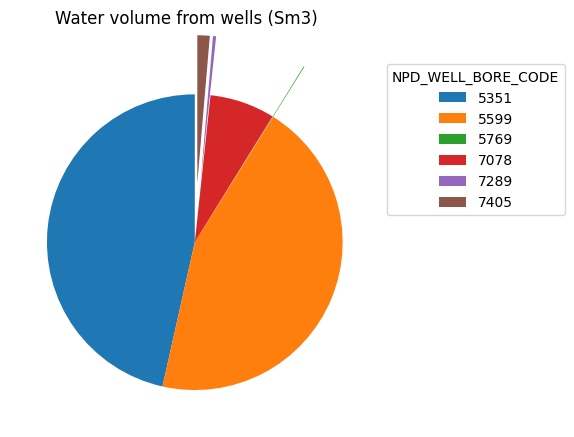

In [ ]:
  fig,ax =plt.subplots()
  ax.pie(df_production_filtered.groupby('NPD_WELL_BORE_CODE')['BORE_WAT_VOL'].sum(),startangle=90,explode = (0,0,0.4,0,0.4,0.4))
  ax.legend(bbox_to_anchor=(1, 1),title = 'NPD_WELL_BORE_CODE',labels = df_production_filtered.groupby('NPD_WELL_BORE_CODE')['BORE_WAT_VOL'].sum().index)
  fig.suptitle('Water volume from wells (Sm3)')
  plt.show()
  # remember this way to remove legends from pie chart

**5351, 5599, 7078 - These wells require intensive water treatment facilities as compared to other 3**

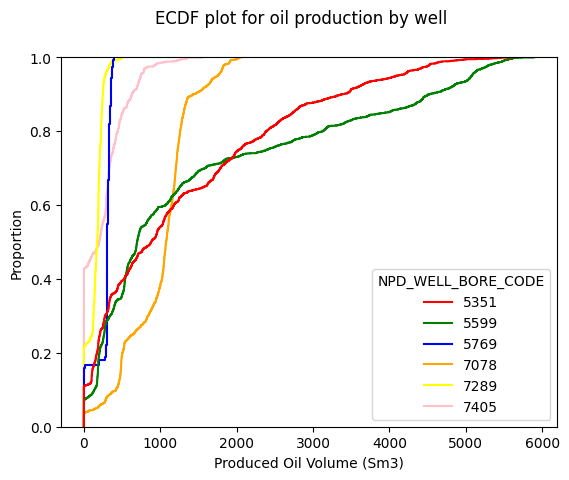

In [ ]:
fig,ax = plt.subplots()
ax = sns.ecdfplot(data = df_production_filtered, hue = 'NPD_WELL_BORE_CODE', x = 'BORE_OIL_VOL', palette = ['red','green','blue','orange','yellow','pink'])
fig.suptitle('ECDF plot for oil production by well')
ax.set_xlabel('Produced Oil Volume (Sm3)')
plt.show()

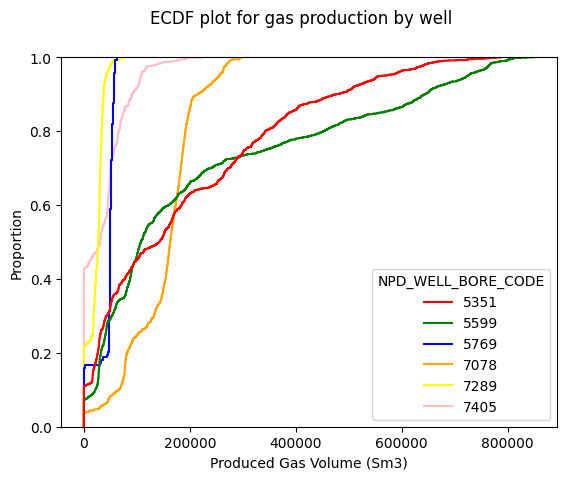

In [ ]:
fig,ax = plt.subplots()
axx = sns.ecdfplot(data = df_production_filtered, hue = 'NPD_WELL_BORE_CODE', x = 'BORE_GAS_VOL', palette = ['red','green','blue','orange','yellow','pink'])
fig.suptitle('ECDF plot for gas production by well')
ax.set_xlabel('Produced Gas Volume (Sm3)')
plt.show()

**Based on the ECDF plot, wells 7405, 7289, and 5769 exhibit a significant proportion of zero Bore_OIL_VOL and Bore_GAS_VOL production data. This, shows their notably lower cumulative production compared to other wells.**

In [ ]:
# we have converted type of Well bore code from integer to string to use it in hue function
df_production_filtered['NPD_WELL_BORE_CODE'] = df_production_filtered['NPD_WELL_BORE_CODE'].astype(str)

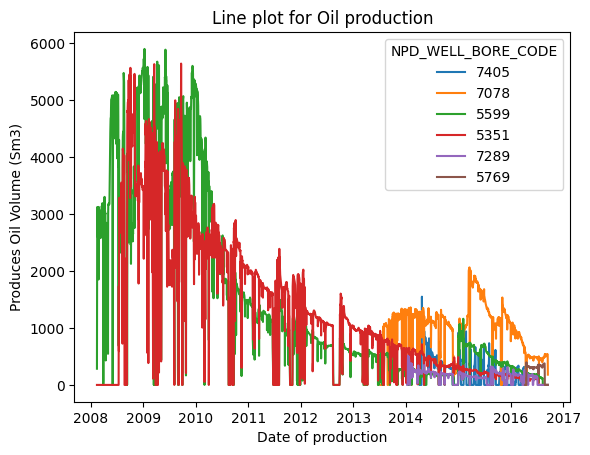

In [ ]:
# line plot for oil production
sns.lineplot(data = df_production_filtered, x = df_production_filtered['DATEPRD'], y = 'BORE_OIL_VOL', hue = 'NPD_WELL_BORE_CODE')
plt.xlabel('Date of production')
plt.ylabel('Produces Oil Volume (Sm3)')
plt.title('Line plot for Oil production');

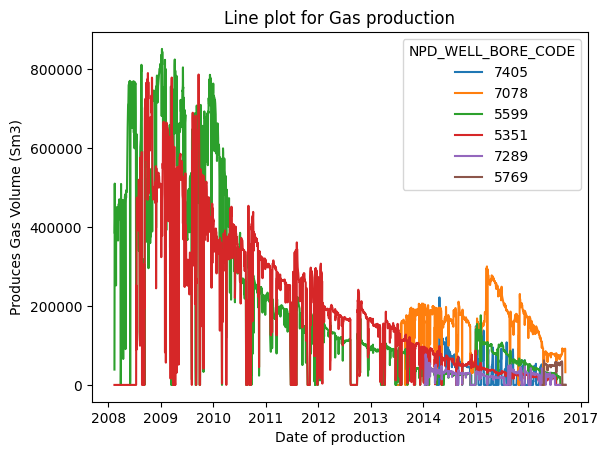

In [ ]:
# line plot for gas production
sns.lineplot(data = df_production_filtered, x = df_production_filtered['DATEPRD'], y = 'BORE_GAS_VOL', hue = 'NPD_WELL_BORE_CODE')
plt.xlabel('Date of production')
plt.ylabel('Produces Gas Volume (Sm3)')
plt.title('Line plot for Gas production');

**The above interactive line plot of Oil and Gas production data, shows that the most significant production is coming from the two wells namely 5599 and 5351. Also in the above date wise production plot we clearly see that the well production value intermittently comes to zero value, which shows us that the well were regularly shut in**

In [ ]:
df_production_filtered['year'] = df_production_filtered['DATEPRD'].dt.year # making year column in dataframe
df_production_filtered['month'] = df_production_filtered['DATEPRD'].dt.month_name() # making month column in dataframe
df_production_filtered['month'] = df_production_filtered['month'].astype(str) # changing datatype of month to string from object

<ipython-input-133-8c0cf85d3742>:1: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(x =df_production_filtered.groupby('year')['BORE_OIL_VOL'].sum().index,hue = df_production_filtered.groupby('year')['BORE_OIL_VOL'].sum().index, legend = False


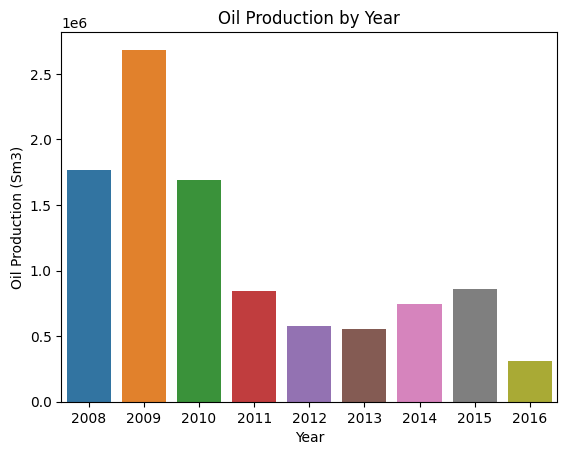

In [ ]:
sns.barplot(x =df_production_filtered.groupby('year')['BORE_OIL_VOL'].sum().index,hue = df_production_filtered.groupby('year')['BORE_OIL_VOL'].sum().index, legend = False
 , y = df_production_filtered.groupby('year')['BORE_OIL_VOL'].sum().values,palette = sns.color_palette())
plt.xlabel('Year')
plt.ylabel('Oil Production (Sm3)')
plt.title('Oil Production by Year');
# assigned x variable as hue and set legend as false as it will be supported in next versions

<ipython-input-134-3dd8e71c28b2>:1: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(x =df_production_filtered.groupby('year')['BORE_OIL_VOL'].sum().index,hue = df_production_filtered.groupby('year')['BORE_GAS_VOL'].sum().index,legend = False


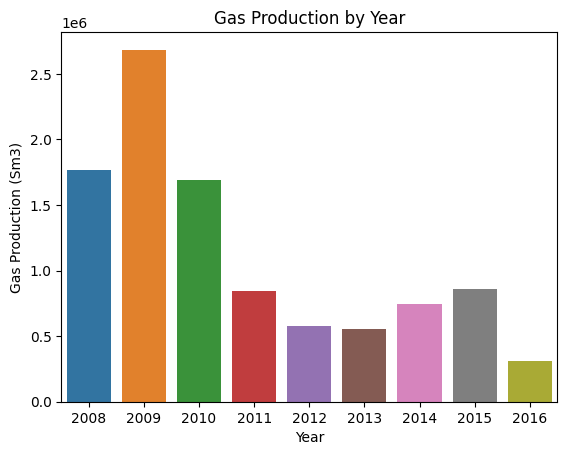

In [ ]:
sns.barplot(x =df_production_filtered.groupby('year')['BORE_OIL_VOL'].sum().index,hue = df_production_filtered.groupby('year')['BORE_GAS_VOL'].sum().index,legend = False
 , y = df_production_filtered.groupby('year')['BORE_OIL_VOL'].sum().values,palette = sns.color_palette("tab10"))
plt.xlabel('Year')
plt.ylabel('Gas Production (Sm3)')
plt.title('Gas Production by Year');

<ipython-input-135-2c854f891e9d>:1: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(x = df_production_filtered.groupby('year')['BORE_WAT_VOL'].sum().index, hue = df_production_filtered.groupby('year')['BORE_WAT_VOL'].sum().index, legend = False


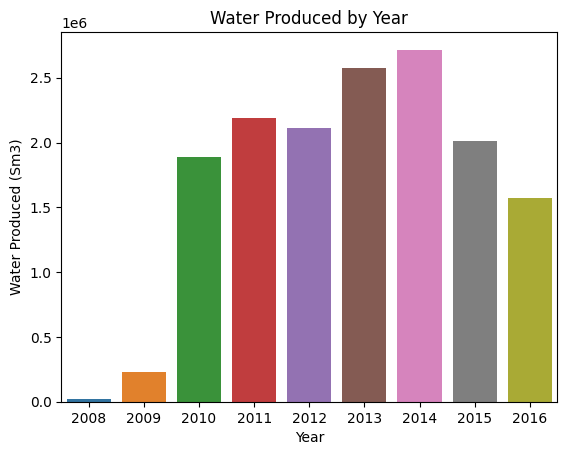

In [ ]:
sns.barplot(x = df_production_filtered.groupby('year')['BORE_WAT_VOL'].sum().index, hue = df_production_filtered.groupby('year')['BORE_WAT_VOL'].sum().index, legend = False
 , y = df_production_filtered.groupby('year')['BORE_WAT_VOL'].sum().values,palette = sns.color_palette("tab10"))
plt.xlabel('Year')
plt.ylabel('Water Produced (Sm3)')
plt.title('Water Produced by Year');

 **- in the years 2008 and 2009 water production is negligible in terms of Hydrocarbon prouction**
  
 **- but after 2010 it is very high as compared to oil and gas production and highest in 2014 and they may have to spend alot on water treatment facilities.**

**- Hydrocarbon production was good enough till 2010 but after that it started declining and water production increased drastically.**

**- Hydrocarbon production was least in 2016**

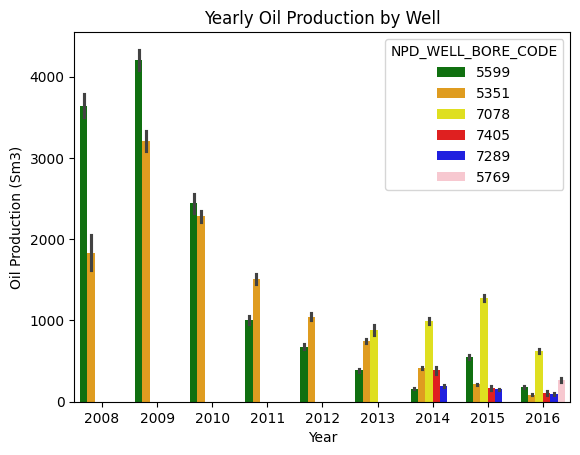

In [ ]:
fig,ax = plt.subplots()
ax =sns.barplot(data = df_production_filtered,y = df_production_filtered['BORE_OIL_VOL'],x = df_production_filtered['year'],hue = 'NPD_WELL_BORE_CODE',
            palette = ['green','orange','yellow','red','blue','pink'])
ax.legend(bbox_to_anchor=(1, 1),title = 'NPD_WELL_BORE_CODE')
plt.xlabel('Year')
plt.ylabel('Oil Production (Sm3)')
plt.title('Yearly Oil Production by Well');

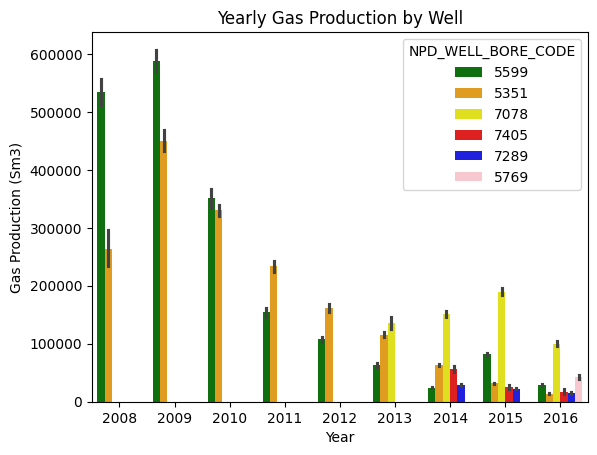

In [ ]:
fig,ax = plt.subplots()
ax =sns.barplot(data = df_production_filtered,y = df_production_filtered['BORE_GAS_VOL'],x = df_production_filtered['year'],hue = 'NPD_WELL_BORE_CODE',
            palette = ['green','orange','yellow','red','blue','pink'])
ax.legend(bbox_to_anchor=(1, 1),title = 'NPD_WELL_BORE_CODE')
plt.xlabel('Year')
plt.ylabel('Gas Production (Sm3)')
plt.title('Yearly Gas Production by Well');

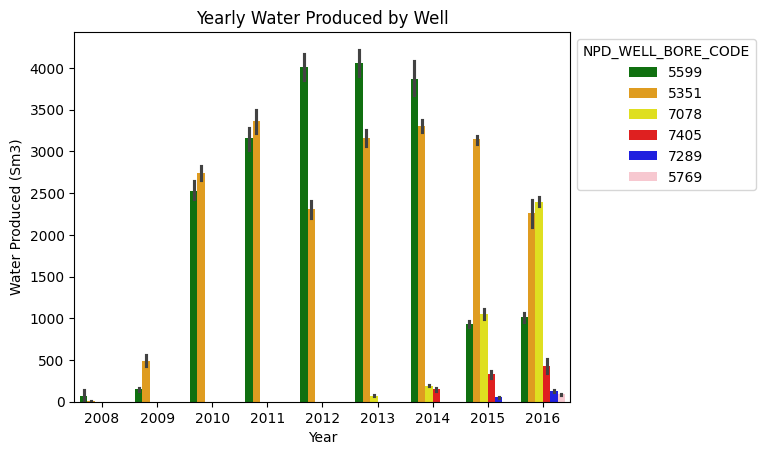

In [ ]:
fig,ax = plt.subplots()
ax =sns.barplot(data = df_production_filtered,y = df_production_filtered['BORE_WAT_VOL'],x = df_production_filtered['year'],hue = 'NPD_WELL_BORE_CODE',
            palette = ['green','orange','yellow','red','blue','pink'])
ax.legend(bbox_to_anchor=(1, 1),title = 'NPD_WELL_BORE_CODE')
plt.xlabel('Year')
plt.ylabel('Water Produced (Sm3)')
plt.title('Yearly Water Produced by Well');

**- Till  2012, 5599 and 5351 are the only wells producing hydrocarbons.**

**- 7078 started hydrocarbon production in 2013 and produced fairly enough hydrocarbon as compared to other wells till 2016.**

**- 7405 and 7289 started hydrocarbon production in 2014**

**- 5756 produced hydrocarbon in 2016 only**

**- The other four wells started production when production from 5599 and 5351 started declining.**

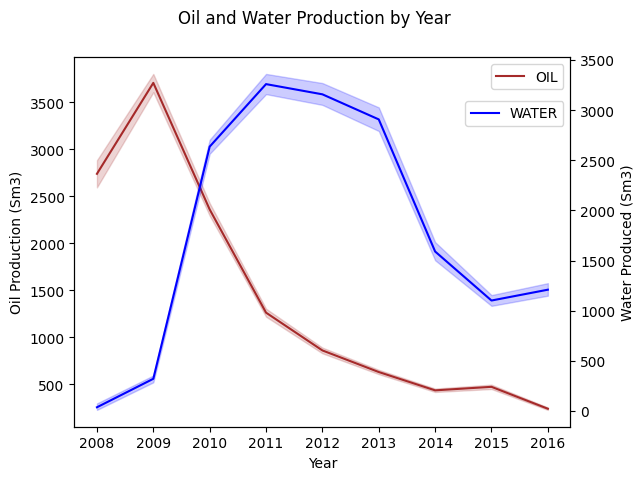

In [ ]:
fig, ax = plt.subplots()
ax = sns.lineplot(data = df_production_filtered,x = df_production_filtered['year'],y = df_production_filtered['BORE_OIL_VOL'], color = 'brown',label = "OIL")
ax.set_xlabel('Year')
ax.set_ylabel('Oil Production (Sm3)')
ax.legend()
ax2 = ax.twinx()
ax2 = sns.lineplot(data = df_production_filtered,x = df_production_filtered['year'],y = df_production_filtered['BORE_WAT_VOL'], color = 'blue',label = "WATER")
ax2.set_xlabel('Year')
ax2.set_ylabel('Water Produced (Sm3)')
ax2.legend(bbox_to_anchor = (1,0.9))
fig.suptitle('Oil and Water Production by Year');
plt.show();

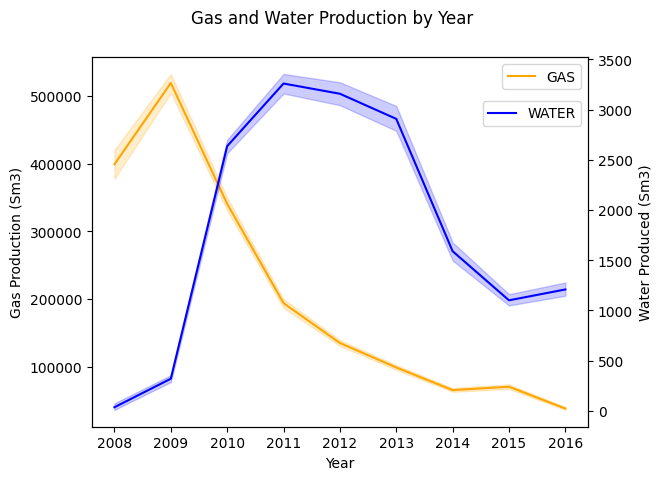

In [ ]:
fig, ax = plt.subplots()
ax = sns.lineplot(data = df_production_filtered,x = df_production_filtered['year'],y = df_production_filtered['BORE_GAS_VOL'], color = 'orange',label = "GAS")
ax.set_xlabel('Year')
ax.set_ylabel('Gas Production (Sm3)')
ax.legend()
ax.legend()
ax2 = ax.twinx()
ax2 = sns.lineplot(data = df_production_filtered,x = df_production_filtered['year'],y = df_production_filtered['BORE_WAT_VOL'], color = 'blue',label = "WATER")
ax2.set_xlabel('Year')
ax2.set_ylabel('Water Produced (Sm3)')
ax2.legend(bbox_to_anchor = (1,0.9))
fig.suptitle('Gas and Water Production by Year');
plt.show();

**Hydrocarbon Production was quite good till 2011 but after that it started declining drastically.**

# **Oil Production by Month for each year**

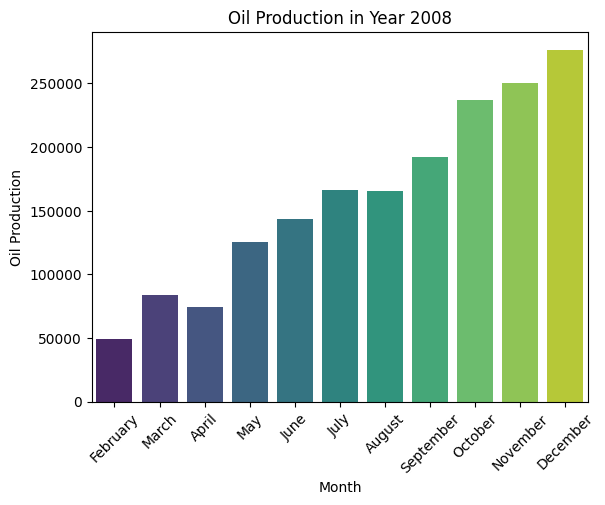

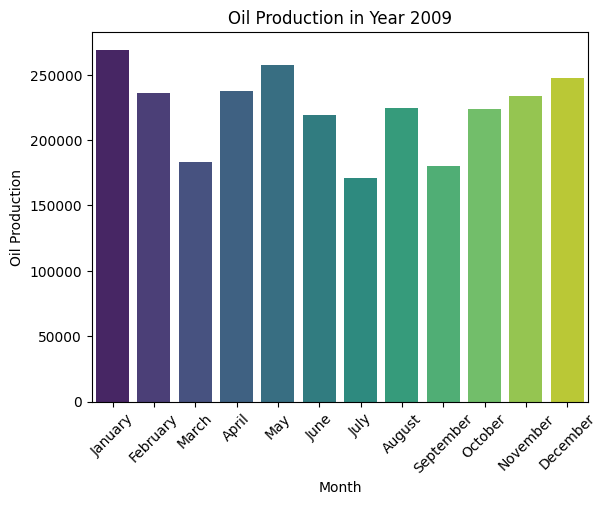

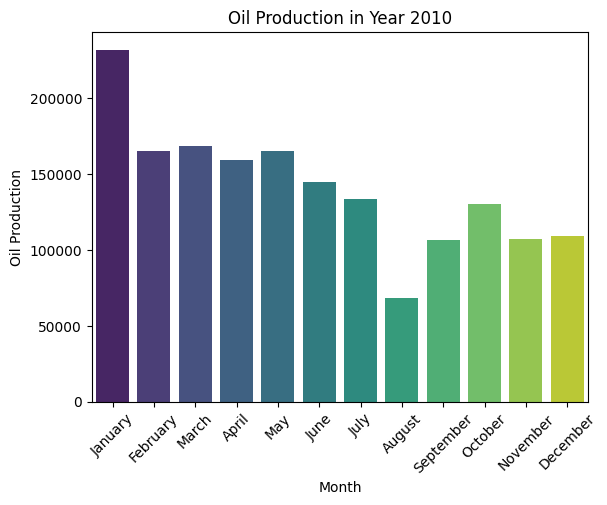

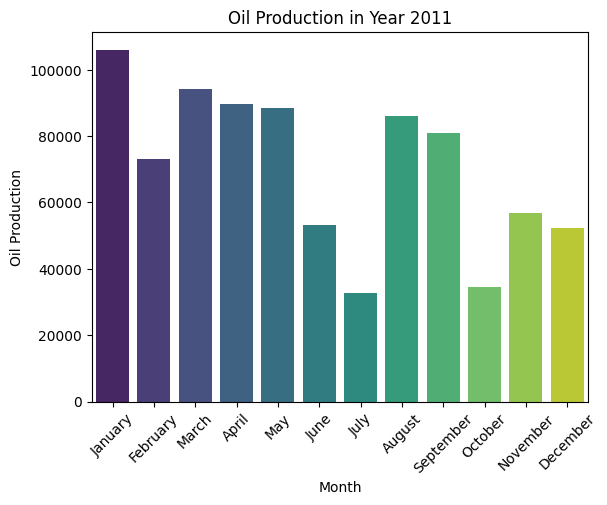

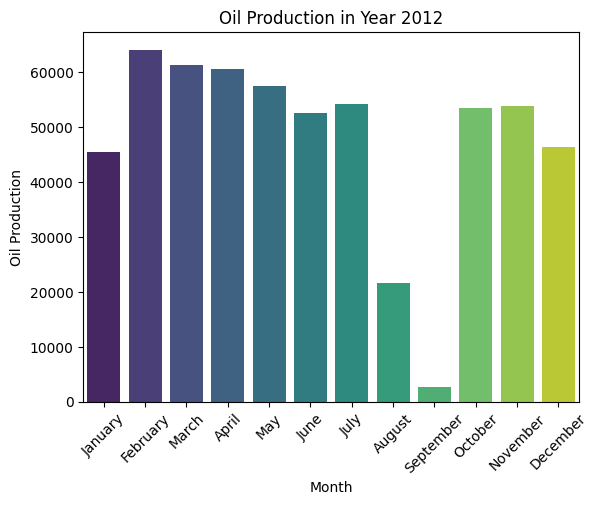

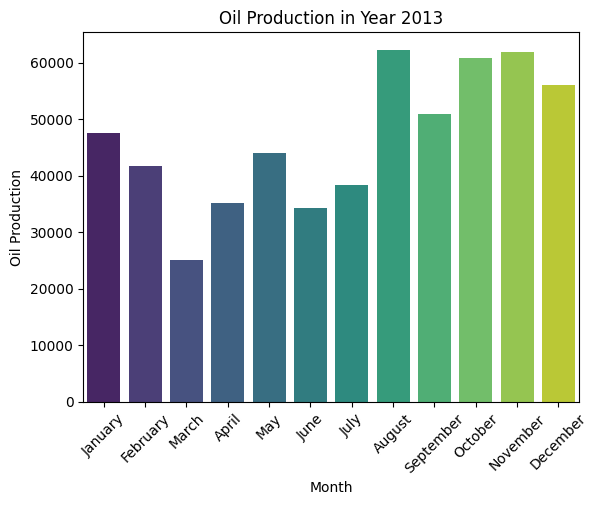

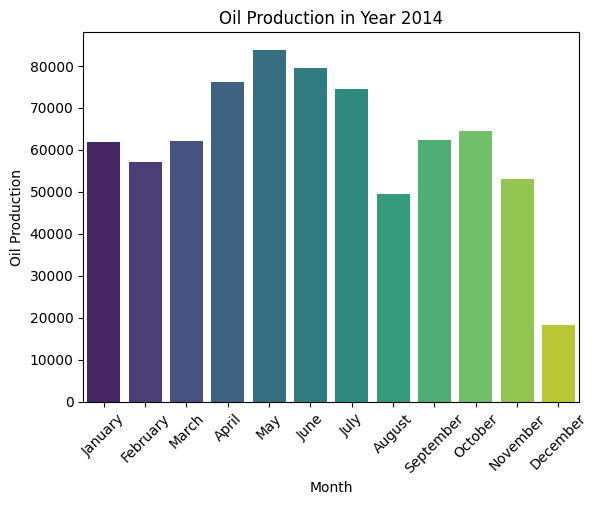

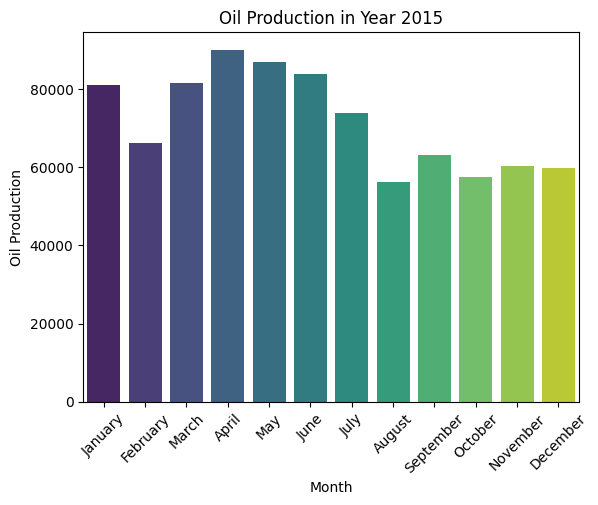

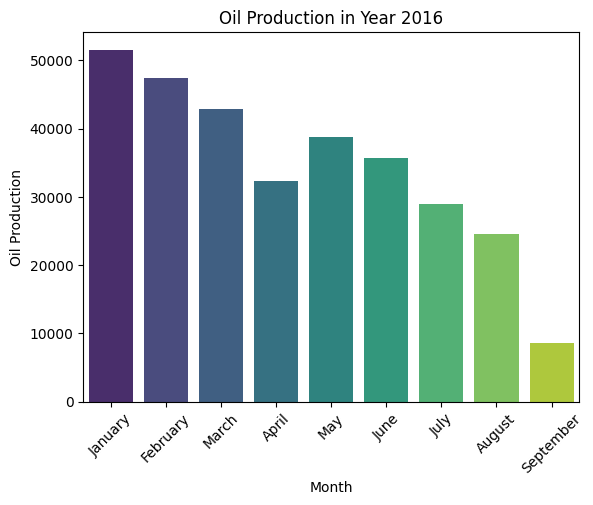

In [ ]:
oil_year_month = df_production_filtered.groupby(['year','month'])['BORE_OIL_VOL'].sum()
oil_year_month = oil_year_month.reset_index()
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
# df.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
year_lst = []
for year in df_production_filtered['year'].unique():
  year_lst.append(year)
  year_lst.sort()
for i in year_lst:
  oil_every_year = oil_year_month[oil_year_month['year']  == i]
  oil_every_year.loc[:,'month'] = oil_every_year.loc[:,'month'].astype(str)
  oil_every_year = oil_every_year.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
  sns.barplot(x = oil_every_year['month'],y = oil_every_year['BORE_OIL_VOL'],palette='viridis', hue = oil_every_year['month'], legend = False)
  plt.xlabel('Month')
  plt.ylabel('Oil Production')
  plt.title(f'Oil Production in Year {i}')
  plt.xticks(rotation=45)
  plt.show();

# **Gas Production by Month for each year**

Axes(0.125,0.11;0.775x0.77)


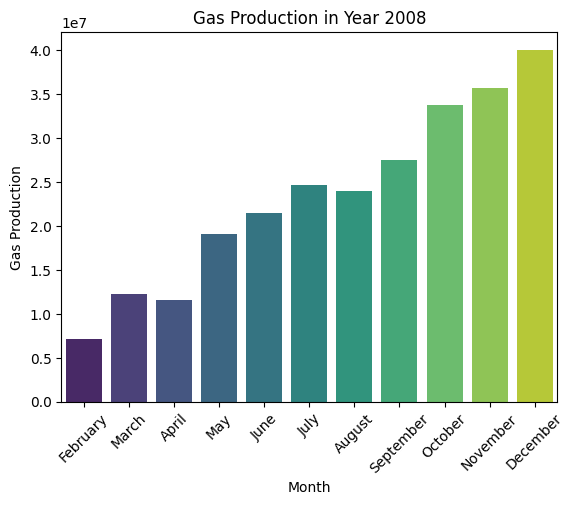

Axes(0.125,0.11;0.775x0.77)


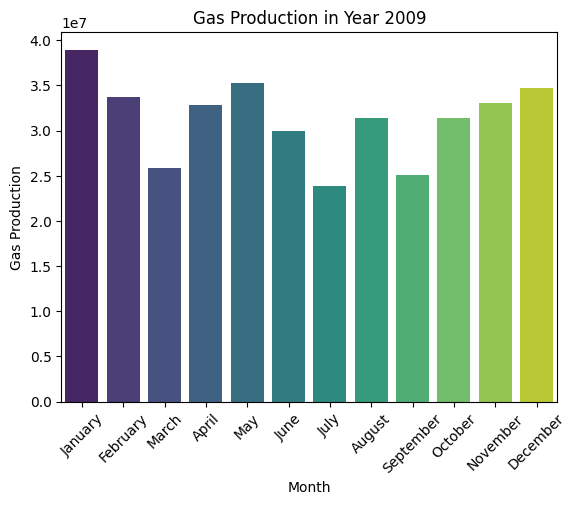

Axes(0.125,0.11;0.775x0.77)


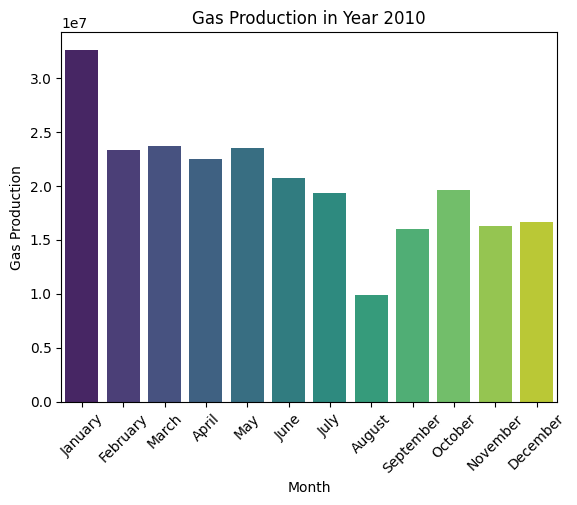

Axes(0.125,0.11;0.775x0.77)


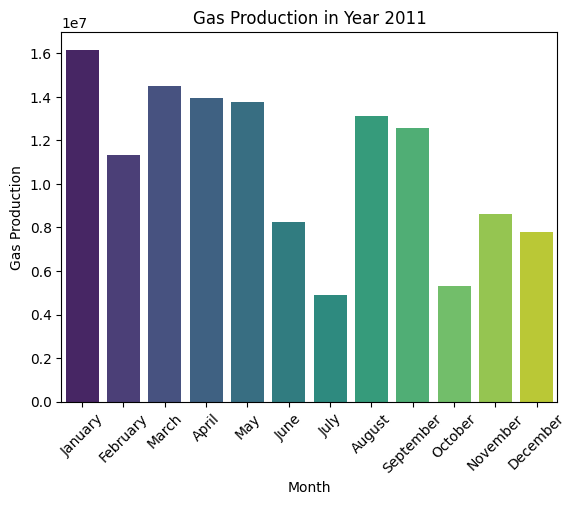

Axes(0.125,0.11;0.775x0.77)


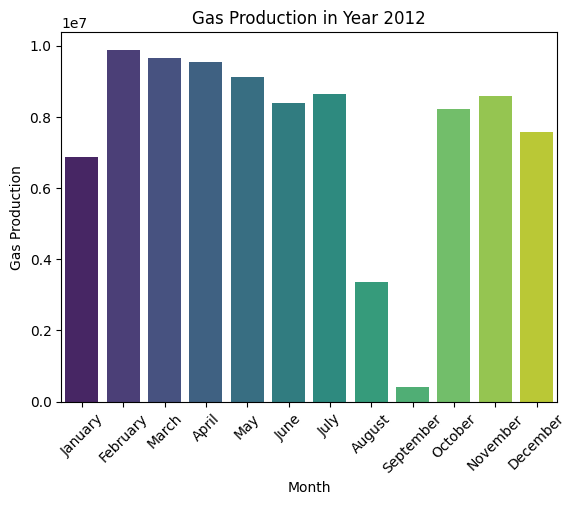

Axes(0.125,0.11;0.775x0.77)


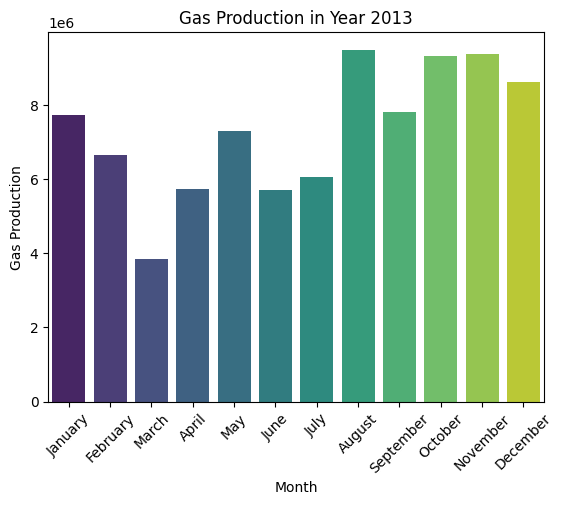

Axes(0.125,0.11;0.775x0.77)


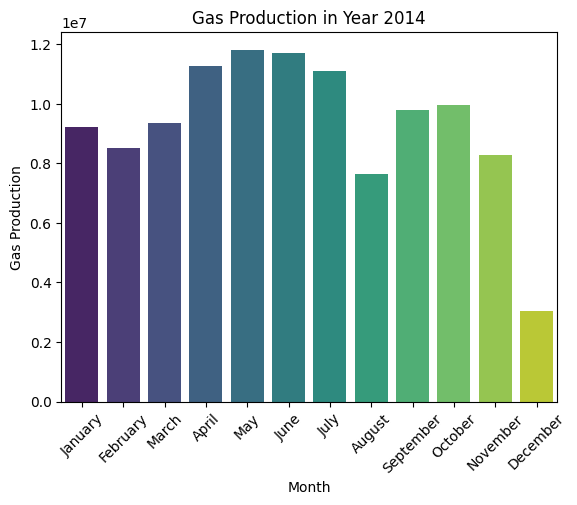

Axes(0.125,0.11;0.775x0.77)


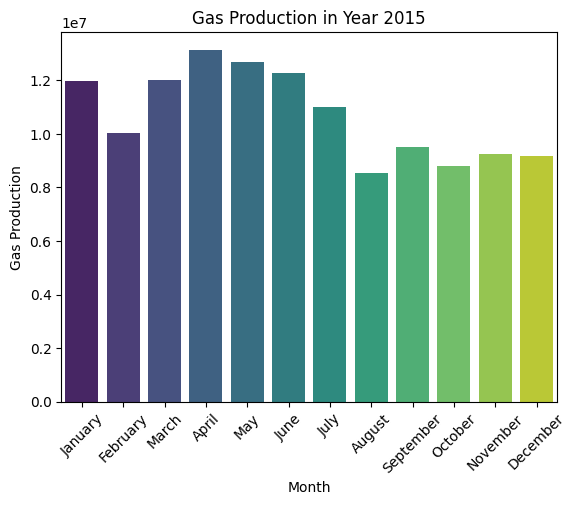

Axes(0.125,0.11;0.775x0.77)


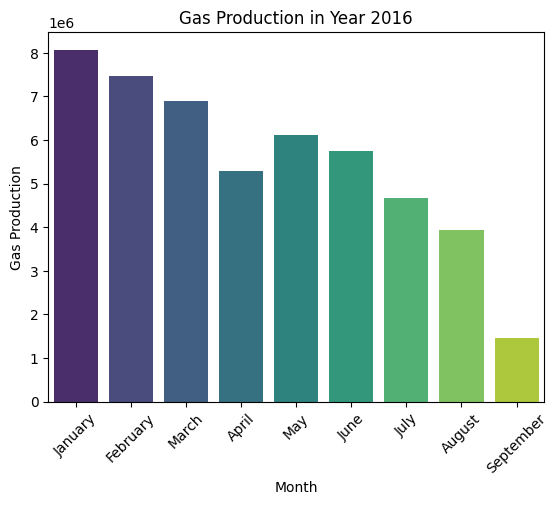

In [ ]:
gas_year_month = df_production_filtered.groupby(['year','month'])['BORE_GAS_VOL'].sum()
gas_year_month = gas_year_month.reset_index()
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
year_lst = []
for year in df_production_filtered['year'].unique():
  year_lst.append(year)
  year_lst.sort()
for i in year_lst:
  gas_every_year = gas_year_month[gas_year_month['year']  == i]
  gas_every_year.loc[:,'month'] = gas_every_year.loc[:,'month'].astype(str)
  gas_every_year = gas_every_year.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
  print(sns.barplot(x = gas_every_year['month'],y = gas_every_year['BORE_GAS_VOL'],palette='viridis', hue = gas_every_year['month'], legend = False))
  plt.xlabel('Month')
  plt.ylabel('Gas Production')
  plt.title(f'Gas Production in Year {i}')
  plt.xticks(rotation=45)
  plt.show();

**Above two cells show Oil and Gas production by month from 2007 to 2016**

# **A summary of Production data Analysis done on the producing well data of Volve Field**

1. After a preliminary glimpse of data it was observed that some of the columns were referring to the same data in with a different name , for example WELL_BORE_CODE''NPD_WELL_BORE_CODE' 'NPD_WELL_BORE_NAME

2. Similarly there were some columns that either had no useful data , or they were not relevant to our analysis . As a result a new filtered data frame was created and all the irrelevant columns were dropped.

3. As our study was specific to producing wells only, so the the data was filtered based on well_type and it was found that out of the 7 wells available, 6 were designated as OP or oil producer, so they were kept in the data.

4. For ease of analysis and classification, the NPD_WELL_BORE_CODE column was retained and other columns referring to wells by name were dropped.

5. A quick heatmap of the filterd data showed that there were no null values for OIL/GAS/Water Volume data available with us. At the same time the number of data points available for each row differed.

6. As the water percentage increases, and it crosses the threshold for economic viability, and the well is abandoned. Although the particular well still might be a producing well, but it is producing more water than hydrocarbon fluid or it may had been a producer well it has achieved its decline phase and is on the verge of abandonment. The same conclusion can be verified from the Water production data of these wells.





# **Recommendation**

The above plot shows a declining oil production value for all the significantly producing wells and for the insignificant wells ,the volume of Oil produced is very less and insignificant but at the same time their water production volume increased making them not viable economically.

As seen in the plots, the production from all the wells were declining and hence the wells should be abandoned.